## Import Machine Learning Packages

In [1]:
# Importing the required packages 
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import matplotlib.pyplot as plt


## Read Data

In [2]:
accidentData=pd.read_csv("../Data/trainingdata.csv")
accidentData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3057 entries, 0 to 3056
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Unnamed: 0           3057 non-null   int64
 1   Number of Vehicles   3057 non-null   int64
 2   1st Road Class       3057 non-null   int64
 3   Road Surface         3057 non-null   int64
 4   Lighting Conditions  3057 non-null   int64
 5   Weather Conditions   3057 non-null   int64
 6   Casualty Class       3057 non-null   int64
 7   Casualty Severity    3057 non-null   int64
 8   Sex of Casualty      3057 non-null   int64
 9   Age of Casualty      3057 non-null   int64
 10  Type of Vehicle      3057 non-null   int64
dtypes: int64(11)
memory usage: 262.8 KB


## Separate Features and Target Attributes

In [3]:
#feature and target split
feat    = ['1st Road Class','Road Surface','Lighting Conditions','Weather Conditions','Casualty Class','Type of Vehicle']
features = accidentData[feat]
target   = accidentData['Casualty Severity']

## Split Training Data and Testing Data

In [4]:
#Split training data(70%) and testing data (30%)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=1)

## Gradient Boosting Learning

Gradient Boosting Classifier
Confusion Matrix [[825   4]
 [ 85   4]]
Accuracy of the model is 0.9030501089324618
precision of the model is 0.5
Recall of the model is 0.0449438202247191
ROC Curve


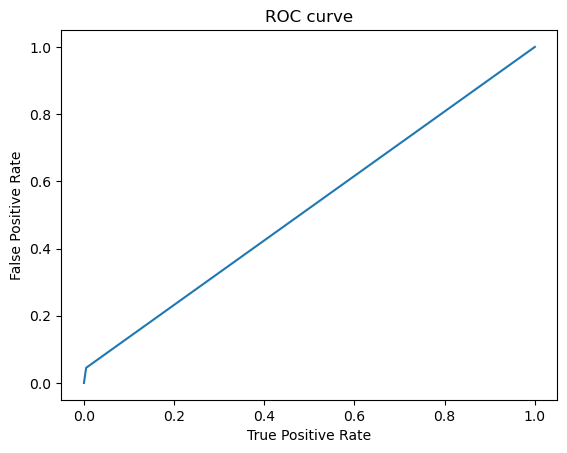

In [5]:
from sklearn.ensemble import GradientBoostingClassifier
print("Gradient Boosting Classifier")

gb = GradientBoostingClassifier(learning_rate=0.1)
gb.fit(X_train, y_train)
y_pred_gb=gb.predict(X_test)

print("Confusion Matrix", metrics.confusion_matrix(y_test, y_pred_gb))
print("Accuracy of the model is", metrics.accuracy_score(y_test, y_pred_gb))
print("precision of the model is", metrics.precision_score(y_test, y_pred_gb))
print("Recall of the model is", metrics.recall_score(y_test, y_pred_gb))
print("ROC Curve")
tpr, fpr, thres=metrics.roc_curve(y_test, y_pred_gb)

plt.plot(tpr, fpr)
plt.title("ROC curve")
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.show()

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay

# Support Vector Classifier model
svr_lin = LinearSVC(multi_class='ovr',C=1.0,loss='squared_hinge', dual=False)
svr_lin.fit(X_train, y_train)

# Predict using training and testing data and display the accuracy, f-1 score, precision for Positive and Negative Sentiment Classifiers 
svr_lin_predictions = svr_lin.predict(X_test)
report = classification_report(y_test,svr_lin_predictions, output_dict=True)
report

C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'0': {'precision': 0.9030501089324618,
  'recall': 1.0,
  'f1-score': 0.9490555237550086,
  'support': 829.0},
 '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 89.0},
 'accuracy': 0.9030501089324618,
 'macro avg': {'precision': 0.4515250544662309,
  'recall': 0.5,
  'f1-score': 0.4745277618775043,
  'support': 918.0},
 'weighted avg': {'precision': 0.8154994992429313,
  'recall': 0.9030501089324618,
  'f1-score': 0.8570446941099151,
  'support': 918.0}}

In [13]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()


# Support Vector Classifier model
random_forest.fit(X_train, y_train)

# Predict using training and testing data and display the accuracy, f-1 score, precision for Positive and Negative Sentiment Classifiers 
random_forest_preds = random_forest.predict(X_test)
report = classification_report(y_test,random_forest_preds, output_dict=True)
report

{'0': {'precision': 0.9092920353982301,
  'recall': 0.991556091676719,
  'f1-score': 0.9486439699942296,
  'support': 829.0},
 '1': {'precision': 0.5,
  'recall': 0.07865168539325842,
  'f1-score': 0.13592233009708737,
  'support': 89.0},
 'accuracy': 0.9030501089324618,
 'macro avg': {'precision': 0.7046460176991151,
  'recall': 0.5351038885349887,
  'f1-score': 0.5422831500456585,
  'support': 918.0},
 'weighted avg': {'precision': 0.8696112171515608,
  'recall': 0.9030501089324618,
  'f1-score': 0.8698506955379708,
  'support': 918.0}}

In [15]:
knn = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
# Support Vector Classifier model
knn.fit(X_train, y_train)

# Predict using training and testing data and display the accuracy, f-1 score, precision for Positive and Negative Sentiment Classifiers 
knn_preds = knn.predict(X_test)
report = classification_report(y_test,knn_preds, output_dict=True)
report

{'0': {'precision': 0.9041850220264317,
  'recall': 0.9903498190591074,
  'f1-score': 0.9453080023028209,
  'support': 829.0},
 '1': {'precision': 0.2,
  'recall': 0.02247191011235955,
  'f1-score': 0.04040404040404041,
  'support': 89.0},
 'accuracy': 0.8965141612200436,
 'macro avg': {'precision': 0.5520925110132159,
  'recall': 0.5064108645857335,
  'f1-score': 0.49285602135343065,
  'support': 918.0},
 'weighted avg': {'precision': 0.8359143608495772,
  'recall': 0.8965141612200436,
  'f1-score': 0.8575776617701504,
  'support': 918.0}}

## Save the Model

In [ ]:
import pickle

#dump on picle
pickle.dump(gb, open('../Model/accidentSeverityPredictor.pkl','wb'))

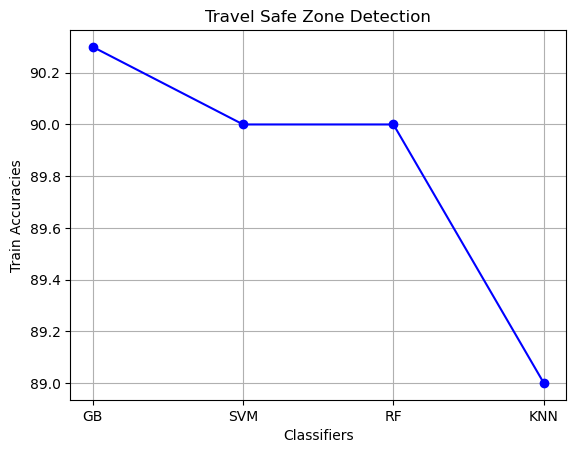

In [3]:
import matplotlib.pyplot as plt

pf_dict = {
    'classifiers': ["GB", "SVM", "RF", "KNN"],
    'train_accuracies': [90.3, 90, 90, 89]
}

plt.plot(pf_dict['classifiers'], pf_dict['train_accuracies'], color='b', marker='o')
plt.xlabel('Classifiers')
plt.ylabel('Train Accuracies')
plt.title('Travel Safe Zone Detection')
plt.grid(True)
plt.show()